In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
trainX.shape

(60000, 28, 28)

In [5]:
testX.shape

(10000, 28, 28)

In [6]:
print(trainX[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

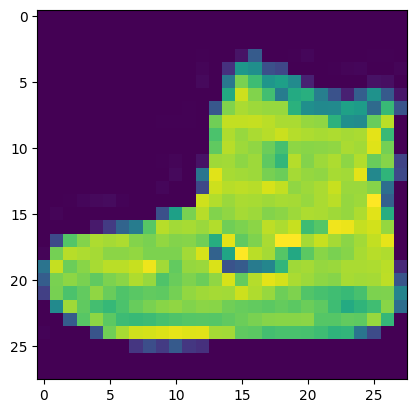

In [7]:
import matplotlib.pyplot as plt
plt.imshow(trainX[0])

Text(0.5, 0, '4')

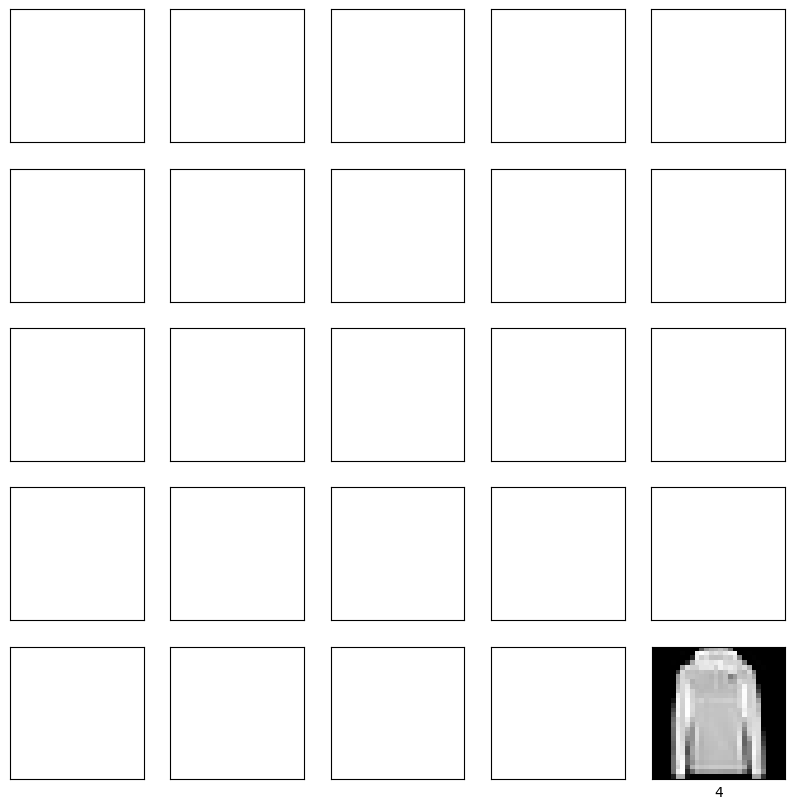

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
plt.imshow(trainX[i],cmap='gray')
plt.xlabel(trainy[i])

In [14]:
trainX=trainX/225
testX=testX/225

In [15]:
print(trainX[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00444444 0.    

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam

In [17]:
from tensorflow.keras.utils import to_categorical
trainy=to_categorical(trainy)
testy=to_categorical(testy)

In [18]:
trainy[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [19]:
trainy[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))



In [21]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.mnist = model.fit(trainX,trainy,epochs=10,validation_data=(testX,testy))

Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.4349 - accuracy: 0.8464 - val_loss: 0.3694 - val_accuracy: 0.8686
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2919 - accuracy: 0.8964 - val_loss: 0.2987 - val_accuracy: 0.8921
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2574 - accuracy: 0.9077 - val_loss: 0.2951 - val_accuracy: 0.8962
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2340 - accuracy: 0.9156 - val_loss: 0.2787 - val_accuracy: 0.9015
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2129 - accuracy: 0.9223 - val_loss: 0.2725 - val_accuracy: 0.9043
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1956 - accuracy: 0.9280 - val_loss: 0.2782 - val_accuracy: 0.9010
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1797 - accuracy: 0.9322 - val_loss: 0.2688 -

In [23]:
#loading image to test
from google.colab import files
import io
from PIL import Image

In [24]:
image_path='/content/robo.jpg'

In [25]:
new_image=Image.open(image_path).convert('L') #gray scale
new_image=new_image.resize((28,28)) #resizing to 28*28
new_image=np.array(new_image) #converting to numpy array
new_image=new_image.reshape((1,28,28,1)).astype('float32')/255 #reshaping and normalizing

In [26]:
pred=model.predict(new_image)
pred_digit=np.argmax(pred)
print(pred)

1/1 [==============================] - 0s 489ms/step
[[5.6537963e-02 6.9632906e-01 3.7019335e-02 6.8538278e-02 6.3159660e-02
  2.6125328e-03 4.3050572e-02 1.6285689e-03 3.0454282e-02 6.6973927e-04]]


In [33]:
prediction=model.predict(new_image)
prediction_digit=np.argmax(prediction)
print(f'predicted digit : {prediction_digit}')

1/1 [==============================] - 0s 22ms/step
predicted digit : 1
